# La función de autocorrelación

En la lección anterior, y en otros cursos acá en la Academia, hemos visto que el índice de correlación es una medida del grado de relación que existe entre dos variables numéricas (o también entre dos Series de Tiempo).

En esta lección usaremos este concepto para definir la función de autocorrelación, que permite comparar la Serie de Tiempo consigo misma y que, al graficarla, nos brinda información relevante de las características de la Serie.

Así que comenzaremos viendo un sencillo ejemplo práctico que nos permitirá entender esta idea básica de la comparación de la Serie consigo misma, luego definiremos formalmente qué es la función de autocorrelación y veremos varios ejemplos de cómo interpretar la información que nos arroja esta función. Y al final veremos un ejemplo práctico de obtención de esta función para una Serie de Tiempo real.




## 1. Idea intuitiva de la función de autocorrelación

Para tener una idea intuitiva de lo que es la función de autocorrelación, comencemos creando una sencilla Serie de Tiempo:

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_22428\3768997289.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index= pd.date_range(start='2018-01-01', periods=36, freq='M'),


            Ventas
2018-01-31     100
2018-02-28     120
2018-03-31     130
2018-04-30     150
2018-05-31     160


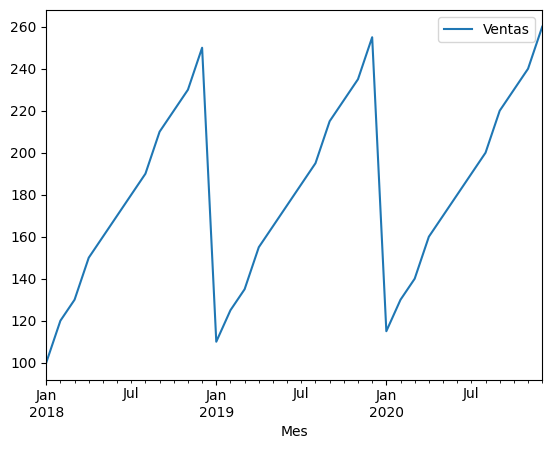

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Creemos una serie de tiempo artificial, con ventas MENSUALES
# durante cierto periodo de tiempo

datos = {
    'Ventas': [100, 120, 130, 150, 160, 170, 180, 190, 210, 220, 230, 250,
              110, 125, 135, 155, 165, 175, 185, 195, 215, 225, 235, 255,
              115, 130, 140, 160, 170, 180, 190, 200, 220, 230, 240, 260],
}
df = pd.DataFrame(datos,
                  index= pd.date_range(start='2018-01-01', periods=36, freq='M'),
                 )
print(df.head())

# Gráfico de la Serie
ax = df.plot();
ax.set_xlabel('Mes');

Y ahora comparemos la Serie consigo misma a través del índice de corrrelación:

Autocorrelación: 
 0.9999999999999999


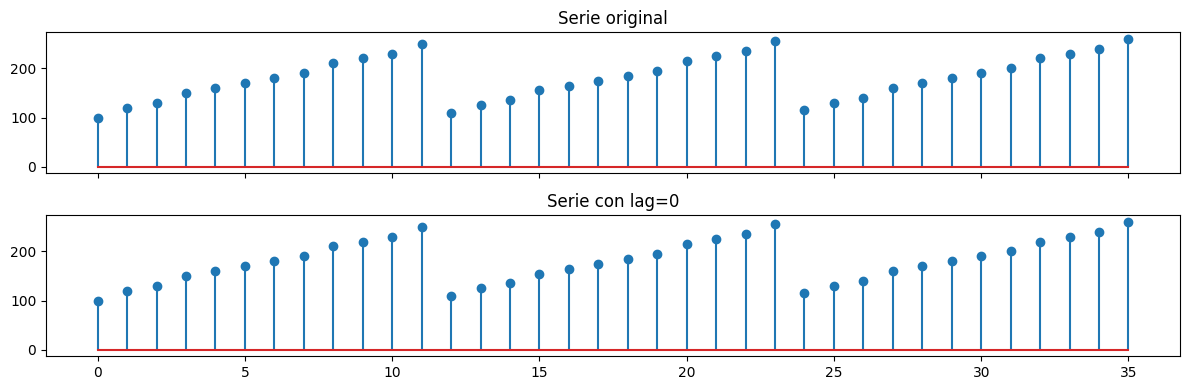

In [4]:
# Graficar serie y serie con lag=0
fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)

ax[0].stem(df['Ventas'])
ax[1].stem(df['Ventas'])

ax[0].set_title('Serie original')
ax[1].set_title('Serie con lag=0')

fig.tight_layout()

# Correlación de la serie consigo misma
print('Autocorrelación: \n', df['Ventas'].corr(df['Ventas']))

Ahora **desplacemos** la Serie 1 muestra (es decir 1 mes) y comparemos la serie original (sin desplazamiento) con la nueva Serie obtenida:

Autocorrelación: 
 0.6464801172040319


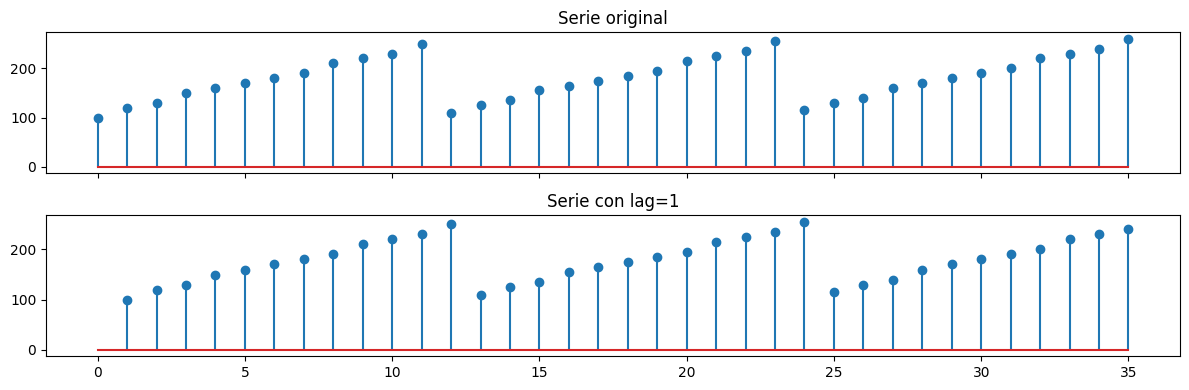

In [5]:
# Desplazar la serie 1 muestra
df['lag_1'] = df['Ventas'].shift(1)

# Graficar serie y serie con lag=1
fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)

ax[0].stem(df['Ventas'])
ax[1].stem(df['lag_1'])

ax[0].set_title('Serie original')
ax[1].set_title('Serie con lag=1')

fig.tight_layout()

# Correlación de la serie con una versión desplazada con lag=1
print('Autocorrelación: \n', df['Ventas'].corr(df['lag_1']))

Repitamos lo anterior pero para un desplazamiento (*lag*) de 2 muestras:

Autocorrelación: 
 0.34485493354399543


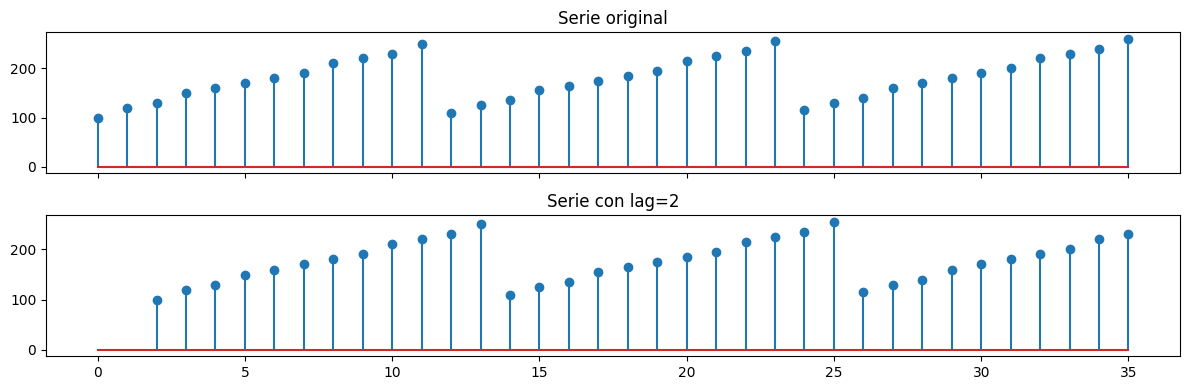

In [6]:
# Desplazar la serie 1 muestra
df['lag_2'] = df['Ventas'].shift(2)

# Graficar serie y serie con lag=1
fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)

ax[0].stem(df['Ventas'])
ax[1].stem(df['lag_2'])

ax[0].set_title('Serie original')
ax[1].set_title('Serie con lag=2')

fig.tight_layout()

# Correlación de la serie con una versión desplazada con lag=2
print('Autocorrelación: \n', df['Ventas'].corr(df['lag_2']))

Hasta este punto vemos que los valores de la correlación se van reduciendo:

| *lag* | autocorrelación |
|:-----:|:-----------:|
| 0     | 1.0         |
| 1     | 0.64        |
| 2     | 0.34        |

Sin embargo, hay algo interesante en esta Serie y es que es estacional: se repite cada 12 meses.

Veamos el valor de la autocorrelación usando un *lag* de 12:

Autocorrelación: 
 0.999775663044765


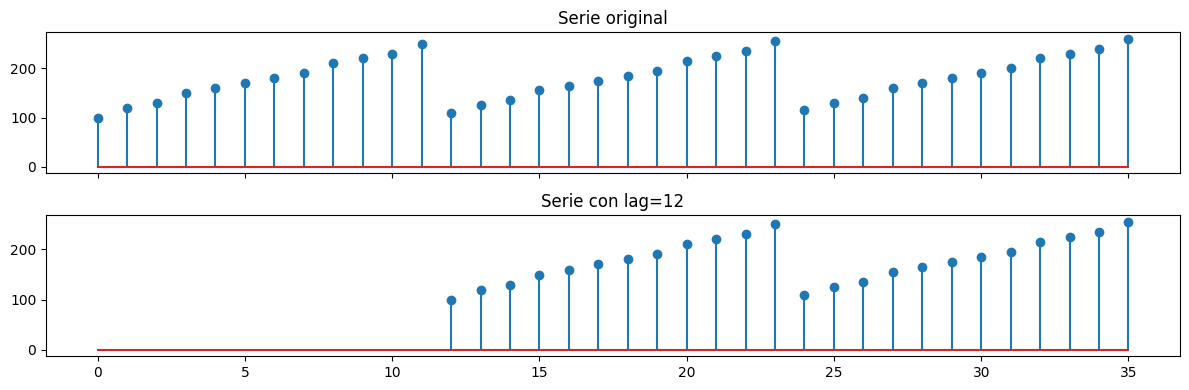

In [7]:
# Desplazar la serie 1 muestra
df['lag_12'] = df['Ventas'].shift(12)

# Graficar serie y serie con lag=1
fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)

ax[0].stem(df['Ventas'])
ax[1].stem(df['lag_12'])

ax[0].set_title('Serie original')
ax[1].set_title('Serie con lag=12')

fig.tight_layout()

# Correlación de la serie con una versión desplazada con lag=12
print('Autocorrelación: \n', df['Ventas'].corr(df['lag_12']))

Vemos que cuando el *lag* es exactamente igual al periodo de la Serie estacional (12 meses) la autocorrelación vuelve a tener un valor alto: 0.99.

Esto quiere decir que si comparamos la Serie estacional con una versión de si misma pero desplazada 1 periodo, el resultado de esta comparación (medido a través del índice de correlación) será muy alto. Es decir, ¡la Serie desplazada se parece mucho a la versión original!

## 2. ¿Qué es la función de autocorrelación?

Con base en el ejemplo anterior ya podemos definir la función de autocorrelación:

> La función de autocorrelación es el conjunto de coeficientes de correlación que resultan de comparar la Serie de Tiempo consigo misma para diferentes desplazamientos (o *lags*)

Así, si repetimos el procedimiento anterior para, por ejemplo, 24 desplazamientos tendremos el siguiente gráfico de la función de autocorrelación o correlograma:

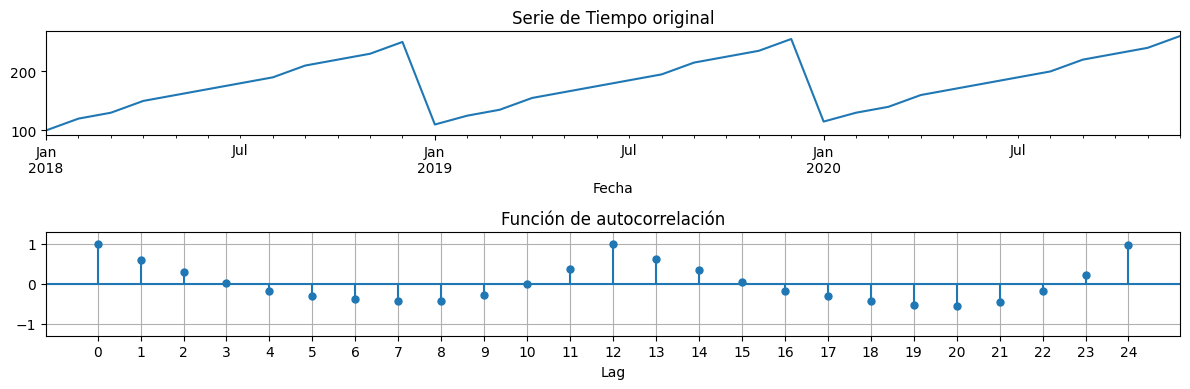

In [8]:
# Importar tsaplots para generar el gráfico de la función de autocorrelación
import statsmodels.graphics.tsaplots as tsaplots

# Grilla de 2x1 para dibujar la Serie de Tiempo original y su correlograma
fig, ax = plt.subplots(2,1, figsize=(12,4))

# Gráfico Serie de Tiempo original
df['Ventas'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo original')

# Gráfico función de autocorrelación
LAGS = 24
tsaplots.plot_acf(df['Ventas'].to_numpy(), 
                  adjusted=True, # Normalizar coeficientes de correlación
                  lags = LAGS,   # Número de desplazamientos a considerar en el cálculo
                  alpha=None,
                  bartlett_confint = False,
                  ax = ax[1], 
                 );
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,LAGS+1))
ax[1].set_title('Función de autocorrelación')
ax[1].set_ylim([-1.3, 1.3])
ax[1].grid()
fig.tight_layout()

## 3. ¿Qué información nos proporciona la función de autocorrelación?

Ya tenemos claro qué información contiene la función de autocorrelación y su utilidad es clave porque nos permite ver ciertas características de la Serie de Tiempo dependiendo, por ejemplo, de si tiene tendencia, estacionalidad, tendencia + estacionalidad o si no exhibe ningún patrón característico.

Para entender cómo interpretar la función de autocorrelación, veamos el comportamiento de esta función para tres diferentes Series de Tiempo:

            estacional  tendencia      ruido
fecha                                       
2018-01-31         100        260  84.707895
2018-02-28         120        272  83.828078
2018-03-31         130        243  79.130258
2018-04-30         150        250  79.702665
2018-05-31         160        232  91.363245


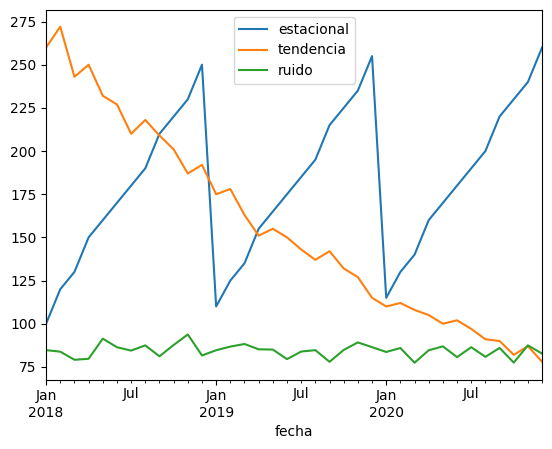

In [11]:
# Leer las diferentes series de tiempo
ruta = '../datasets/EDA/'
series = pd.read_csv(ruta + 'series_est_tend_ruido.csv',
                     parse_dates=['fecha'],
                     index_col='fecha'
                    )

print(series.head())

# Y graficarlas
series.plot();

Acá tenemos tres series con comportamientos muy diferentes:

- Una serie estacional con periodicidad de 12 meses (en azul)
- Una serie con tendencia negativa (naranja)
- Y una serie que no exhibe ningún patrón específico, es decir cuyos valores son totalmente aleatorios (en verde)

Veamos las funciones de autocorrelación de cada una de estas series, comenzando con la estacional:

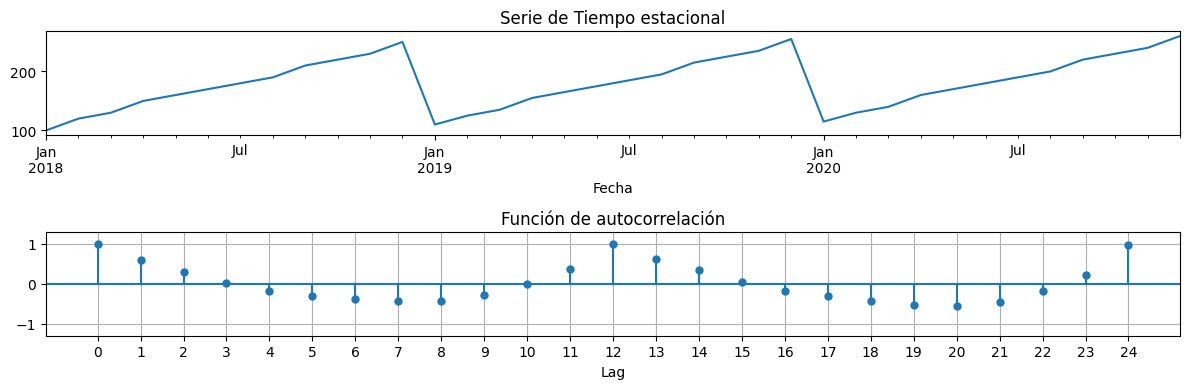

In [12]:
# Gráfico serie estacional
fig, ax = plt.subplots(2,1, figsize=(12,4))

# Serie de tiempo
series['estacional'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo estacional')

# Gráfico función de autocorrelación
LAGS = 24
tsaplots.plot_acf(series['estacional'].to_numpy(), adjusted=True, alpha=None,
                  lags = LAGS, ax = ax[1], bartlett_confint = False);
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,LAGS+1))
ax[1].set_title('Función de autocorrelación')
ax[1].set_ylim([-1.3,1.3])
ax[1].grid()
fig.tight_layout()

Vemos que en este caso la función de autocorrelación tiene valores más grandes en múltiplos enteros de la periodicidad de la Serie (12 meses, 24 meses, etc.).

Así que podemos concluir que:

> **Cuando una Serie es estacional, la función de autocorrelación tendrá valores altos en múltiplos enteros del periodo de la Serie**

Veamos qué ocurre con la Serie con tendencia negativa:

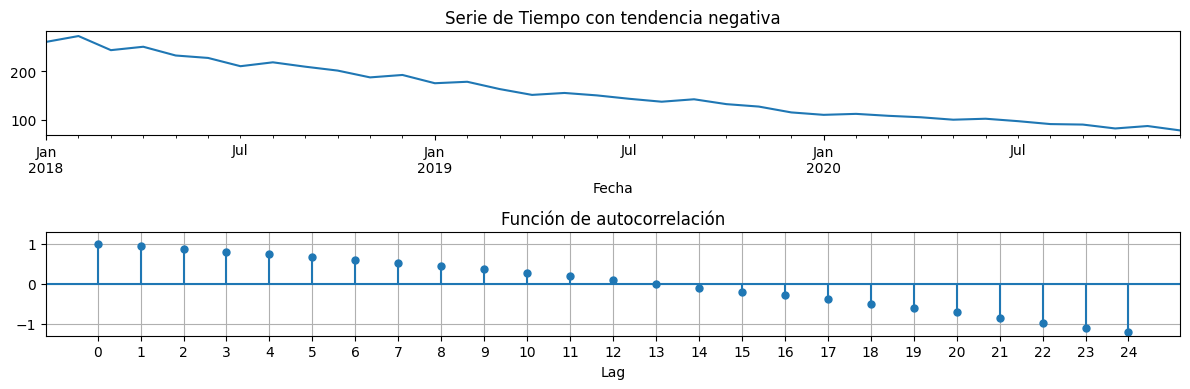

In [13]:
# Gráfico serie con tendencia
fig, ax = plt.subplots(2,1, figsize=(12,4))

# Serie de tiempo
series['tendencia'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo con tendencia negativa')

# Gráfico función de autocorrelación
LAGS = 24
tsaplots.plot_acf(series['tendencia'].to_numpy(), adjusted=True, alpha=None,
                  lags = LAGS, ax = ax[1], bartlett_confint = False);
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,LAGS+1))
ax[1].set_title('Función de autocorrelación')
ax[1].set_ylim([-1.3, 1.3])
ax[1].grid()
fig.tight_layout()

En este caso vemos que la función de autocorrelación para *lags* "pequeños" (1, 2, 3, por ejemplo) tiende a ser más grande y que a medida que se incrementan los *lags* el valor de la función de autocorrelación decrece.

Esto se debe a que para *lags* pequeños, las observaciones vecinas son más cercanas, pero cuando el *lag* es grande la tendencia hace que las observaciones sean muy diferentes, generando valores de autocorrelación pequeños.

Así que podemos concluir que:

> **Cuando una Serie tiene tendencia (positiva o negativa) la función de autocorrelación tendrá valores grandes (y positivos) para *lags* pequeños, y a medida que aumentan los *lags* los valores de la función tienen a ser cada vez más pequeños (y negativos).**

Y, por último, veamos qué ocurre con la Serie de Tiempo que sólo contiene ruido:

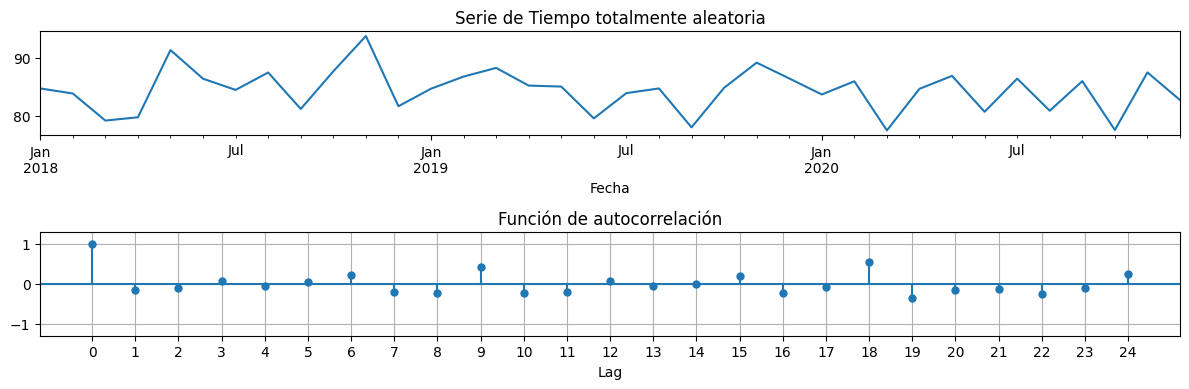

In [14]:
# Gráfico serie totalmente aleatoria
fig, ax = plt.subplots(2,1, figsize=(12,4))

# Serie de Tiempo
series['ruido'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo totalmente aleatoria')

# Gráfico función de autocorrelación
LAGS = 24
tsaplots.plot_acf(series['ruido'].to_numpy(), adjusted=True, alpha=None,
                  lags = LAGS, ax = ax[1], bartlett_confint = False);
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,LAGS+1))
ax[1].set_ylim([-1.3, 1.3])
ax[1].grid()
ax[1].set_title('Función de autocorrelación')
fig.tight_layout()

En este caso vemos que el único componente con un valor relativamente alto en la función de autocorrelación es aquel obtenido para un *lag* igual a 0 (que se obtiene cuando comparamos la Serie consigo misma, sin desplazarla), mientras que para todos los demás valores de *lag* la función de autocorrelación tiene valores cercanos a 0.

De esto podemos concluir que:

> **Cuando una Serie de Tiempo tiene un alto grado de aleatoriedad, todos los componentes de su función de autocorrelación (exceptuando aquel para *lag=0*) tendrán valores cercanos a 0**

## 4. Intervalo de confianza en la función de autocorrelación

En la lección 6 del curso "Estadística Inferencial: Fundamentos" hablamos de los intervalos de confianza que en esencia:

> Indican el nivel de certeza (medido como un porcentaje) que tendremos de que nuestros datos se encuentren dentro de un rango determinado de valores.

Y podemos aprovechar este concepto para mostrar el intervalo de confianza en el correlograma. Por ejemplo, si suponemos un intervalo de confianza del 95% aplicado a los valores de la función de autocorrelación entonces:

- Los valores dentro de esos rangos mínimo y máximo correspondientes al 95% se pueden considerar dentro del rango normal de valores
- Mientras que los valores por fuera de esos rangos (y correspondientes al 5%) se pueden considerar valores de autocorrelación excepcionalmente grandes (si son positivos) o pequeños (si son negativos) y por tanto nos indican algún comportamiento característico en la Serie de Tiempo que estamos analizando

Entendamos lo anterior con algunos ejemplos. Generemos nuevamente los gráficos de la función de autocorrelación para las tres series de tiempo (estacional, tendencia y ruido) pero ahora superpongamos en cada caso el intervalo de confianza del 95%:

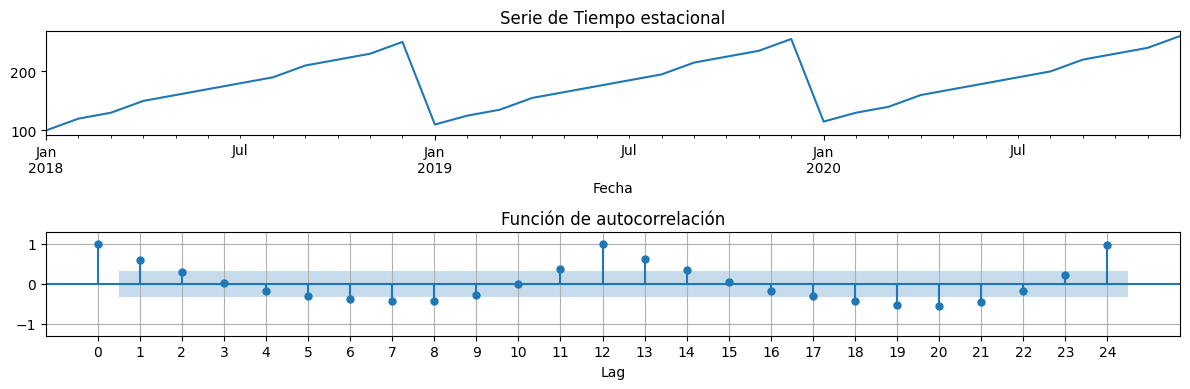

In [15]:
# Gráfico serie estacional
fig, ax = plt.subplots(2,1, figsize=(12,4))

# Serie de tiempo
series['estacional'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo estacional')

# Gráfico función de autocorrelación
LAGS = 24
tsaplots.plot_acf(series['estacional'].to_numpy(), 
                  adjusted=True, 
                  alpha=0.05, # Intervalo de confianza del 95%
                  lags = LAGS, ax = ax[1], bartlett_confint = False);
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,LAGS+1))
ax[1].set_title('Función de autocorrelación')
ax[1].set_ylim([-1.3,1.3])
ax[1].grid()
fig.tight_layout()

Y en este caso los componentes menos significativos se encuentran dentro de la región sombreada. Mientras que los componentes más significativos se encuentran por fuera y corresponden a lags de 1, 6, 7, 12, 13, 19, 20 y 24.

Pero lo interesante en este caso es que de todos estos componentes significativos, los de mayor amplitud son los ubicados en *lag=12* y *lag=24* que corresponden precisamente a la periodicidad de esta Serie estacional.

Así que si dibujamos la función de autocorrelación y superponemos el intervalo de confianza (de por ejemplo el 95%) fácilmente podemos ver los componentes más relevantes y podemos determinar la periodicidad de la Serie (aquellos componentes de mayor amplitud y fuera del intervalo de confianza).

Veamos lo que ocurre con la serie con tendencia negativa:

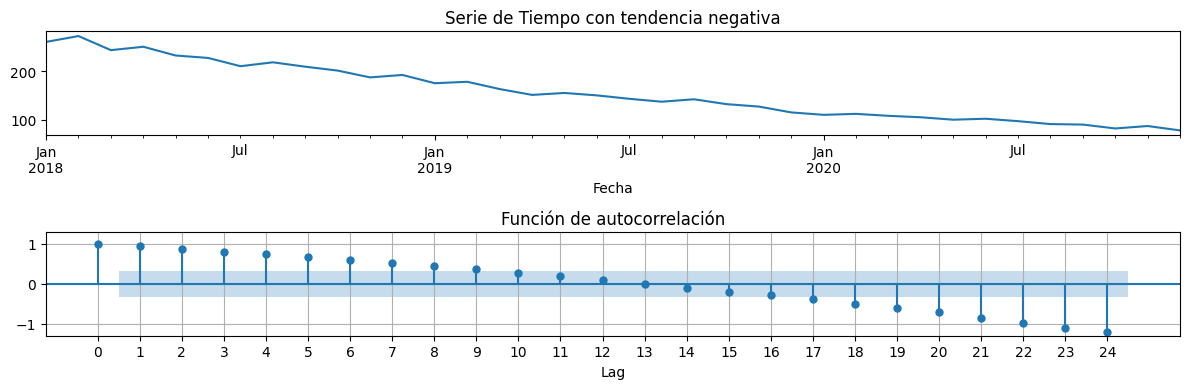

In [16]:
# Gráfico serie con tendencia
fig, ax = plt.subplots(2,1, figsize=(12,4))

# Serie de tiempo
series['tendencia'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo con tendencia negativa')

# Gráfico función de autocorrelación
LAGS = 24
tsaplots.plot_acf(series['tendencia'].to_numpy(), 
                  adjusted=True,
                  alpha=0.05, # Intervalo de confianza del 95%
                  lags = LAGS, ax = ax[1], bartlett_confint = False);
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,LAGS+1))
ax[1].set_title('Función de autocorrelación')
ax[1].set_ylim([-1.3, 1.3])
ax[1].grid()
fig.tight_layout()

Y en este caso vemos que los componentes más relevantes con los ubicados en *lags* de 1, 2, 3, 4... 9... 21, 22, 23, 24. Además, estos componentes van reduciendo su amplitud lo que nos permite confirmar que la Serie tiene tendencia.

Y veamos qué ocurre con la Serie que contiene únicamente ruido:

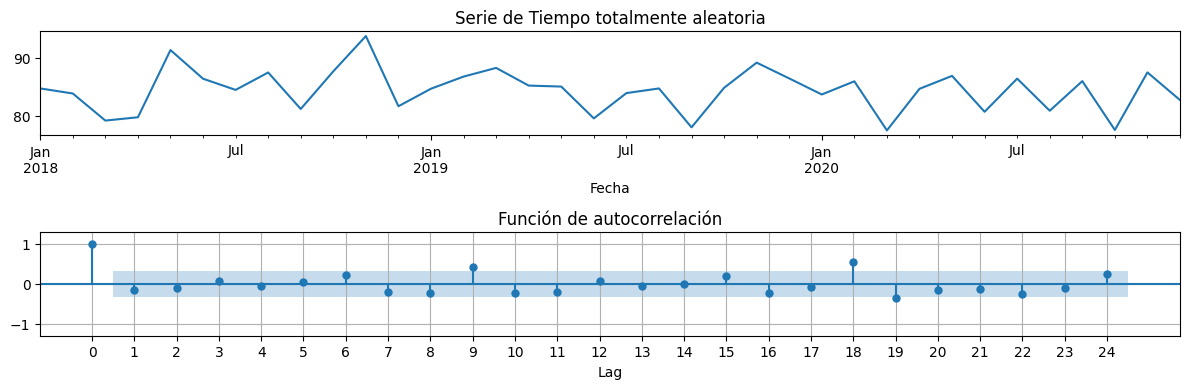

In [17]:
# Gráfico serie totalmente aleatoria
fig, ax = plt.subplots(2,1, figsize=(12,4))

# Serie de Tiempo
series['ruido'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo totalmente aleatoria')

# Gráfico función de autocorrelación
LAGS = 24
tsaplots.plot_acf(series['ruido'].to_numpy(), 
                  adjusted=True, 
                  alpha=0.05, # Intervalo de confianza del 95%
                  lags = LAGS, ax = ax[1], bartlett_confint = False);
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,LAGS+1))
ax[1].set_ylim([-1.3, 1.3])
ax[1].grid()
ax[1].set_title('Función de autocorrelación')
fig.tight_layout()

Y en este caso vemos que prácticamente todos los componentes (para *lags* mayores que 0) están dentro del intervalo de confianza y por tanto esto nos permite confirmar que se trata de una Serie de Tiempo aleatoria.

## 5. Ejemplo práctico

Muy bien, teniendo claro qué es la función de autocorrelación, cómo interpretarla y cómo usar los intervalos de confianza para facilitar esta interpretación, lo único que nos resta es ver un ejemplo práctico aplicado a una Serie de Tiempo real.

Realizaremos este ejemplo sobre la serie *co2.csv* usada en lecciones anteriores. Así que comencemos leyendo y graficando esta Serie de Tiempo:

              co2
fecha            
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


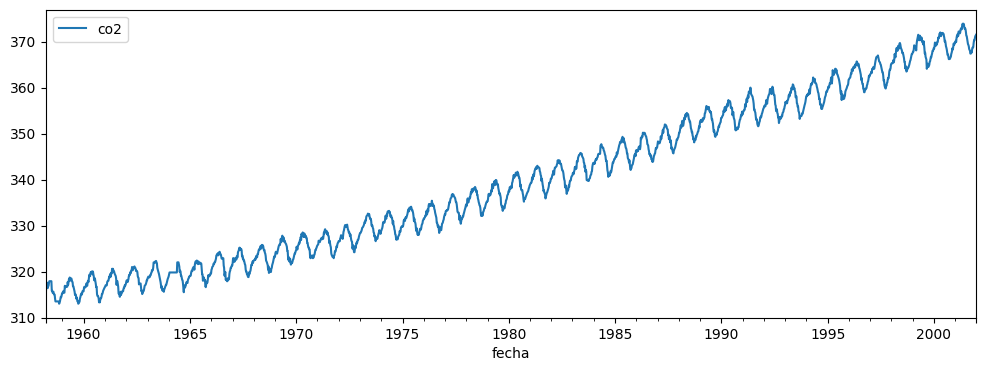

In [19]:
# Serie CO2
# Leer dataset co2
import pandas as pd

RUTA = '../datasets/EDA/'
co2_df = pd.read_csv(RUTA + 'co2.csv', 
                     parse_dates=['fecha'],
                     index_col='fecha'
                    )

# Imprimir encabezado
print(co2_df.head())

# Graficar
co2_df.plot(figsize=(12,4));

Y recordemos de lecciones anteriores que esta Serie de Tiempo tiene tendencia creciente y estacionalidad (con un periodo de 12 meses). Recordemos además que los datos están tomados con una frecuencia semanal.

Veamos qué características podemos ver en su función de autocorrelación:

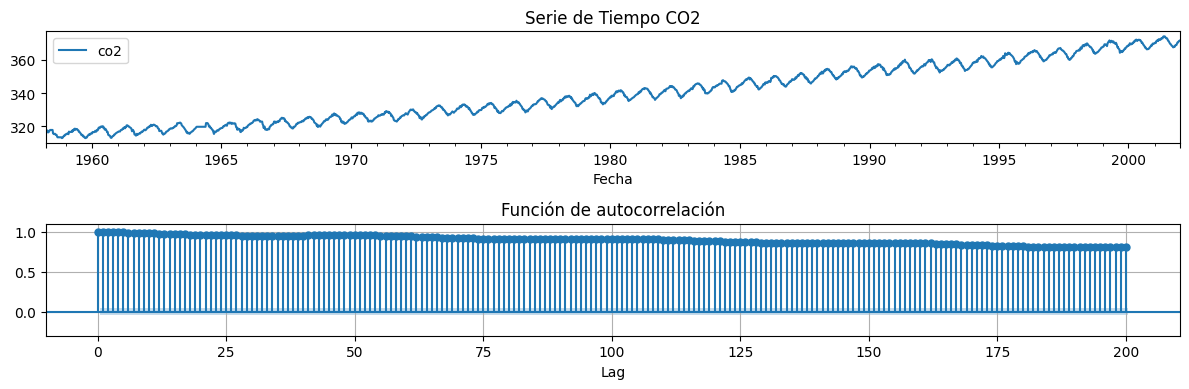

In [20]:
# Grilla 2x1
fig, ax = plt.subplots(2,1, figsize=(12,4))

# Serie de Tiempo
co2_df.plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo CO2')

# Gráfico función de autocorrelación
LAGS = 200 # Como la frecuencia es semanal, calcularemos la func. de autocorr. para 200 semanas
tsaplots.plot_acf(co2_df.to_numpy(), 
                  adjusted=True, 
                  alpha=0.05, # Intervalo de confianza del 95%
                  lags = LAGS, ax = ax[1], bartlett_confint = False);
ax[1].set_xlabel('Lag')
ax[1].set_ylim([-0.3, 1.1])
ax[1].grid()
ax[1].set_title('Función de autocorrelación')
fig.tight_layout()

Inicialmente este gráfico no nos permite ver claramente el componente estacional y el patrón observado corresponde más a una Serie de Tiempo con tendencia (valores de autocorrelación que decrecen a medida que aumentan los *lags*).

Esto se debe a que, si observamos la Serie de Tiempo original, la tendencia tiene una amplitud mayor (variaciones de 320 a 360) que las variaciones estacionales.

Si queremos ver en detalle el componente estacional podemos:

1. Descomponer la Serie de Tiempo
2. Visualizar la función de autocorrelación **únicamente del componente estacional**

Veamos esta implementación:

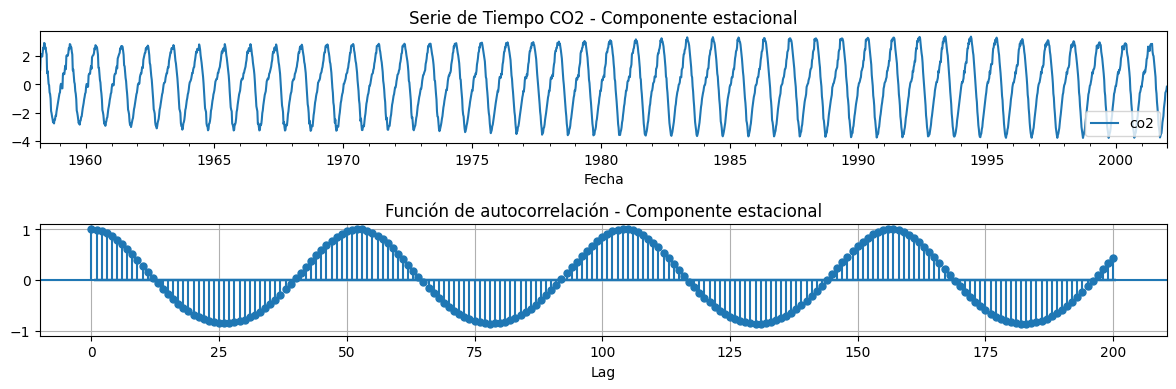

In [20]:
# Extraer componente estacional
from statsmodels.tsa.seasonal import STL

# Descomposición STL CO2
co2_stl = STL(
    co2_df,
    seasonal = 13).fit()

# Extraer el componente estacional como un DataFrame de Pandas
co2_seas = co2_stl.seasonal.to_frame("co2")

# Graficar componente estacional y su función de autocorrelación
fig, ax = plt.subplots(2,1, figsize=(12,4))

co2_seas.plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de Tiempo CO2 - Componente estacional')

LAGS = 200 # Como la frecuencia es semanal, calcularemos la func. de autocorr. para 200 semanas
tsaplots.plot_acf(co2_seas.to_numpy(), 
                  adjusted=True, 
                  alpha=0.05, # Intervalo de confianza del 95%
                  lags = LAGS, ax = ax[1], bartlett_confint = False);
ax[1].set_xlabel('Lag')
ax[1].set_ylim([-1.1, 1.1])
ax[1].grid()
ax[1].set_title('Función de autocorrelación - Componente estacional')
fig.tight_layout()

Y acá vemos claramente un patrón estacional en la función de autocorrelación. En particular vemos que los máximos se alcanzan con *lags* de 52, 104, 156, etc. Es decir que la periodicidad de este componente estacional es de 52 semanas: ¡es decir 1 año!

## 6. Aspectos a tener en cuenta

- La función de autocorrelación es el resultado de realizar la comparación de la Serie de Tiempo consigo misma pero para diferentes desplazamientos (o *lags*)
- Y al realizar esta comparación podemos ver la estacionalidad y la tendencia en la Serie o podemos determinar si la Serie tiene un comportamiento aleatorio.
- Y podemos añadir al correlograma los intervalos de confianza para determinar cuáles niveles de autocorrelación son más relevantes, lo que nos permite extraer información importante de la Serie de Tiempo que estemos analizando